In [1]:
import pandas as pd
import numpy as np
import os, random, math, datetime
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [3]:
df_input_hourly, df_input_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

In [4]:
bloom_date = np.datetime64(datetime.datetime.strptime('01/11/2002', '%d/%m/%Y'), 'D')
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

weight_1 = params.growth.fruitDM0_weight_1
mu_1 = params.growth.fruitDM0_mu_1
sigma_1 = params.growth.fruitDM0_sigma_1
weight_2 = params.growth.fruitDM0_weight_2
mu_2 = params.growth.fruitDM0_mu_2
sigma_2 = params.growth.fruitDM0_sigma_2

DM_fruit_0 = weight_1 * np.random.normal(mu_1, sigma_1) + weight_2 * np.random.normal(mu_2, sigma_2)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [5]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(
            bloom_date,
            nb_fruits,
            nb_leaves,
            sunlit_bs,
            df_input_daily,
            df_input_hourly,
            params,
            DM_fruit_0,
            DM_fruit_ini=np.nan,
            sim_date_ini=None,
            dd_thresh=np.nan,
            stop_sim_ddcum=np.nan,
            verbose=False
        )
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,0.119910,2.615529,-0.417434,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,5.0,0.462774,42.0
1,2002-12-14,154.861247,18.758411,123.221021,15.456553,110.381391,12.714561,0.117967,2.572635,-0.407921,...,0.001555,0.004973,0.007386,0.013914,0.014292,0.019892,367.50,5.0,0.462774,43.0
2,2002-12-15,163.671393,18.875073,131.015752,15.551269,117.363911,12.792474,0.116056,2.530444,-0.336490,...,0.001734,0.004680,0.007114,0.013528,0.013859,0.018788,377.40,5.0,0.462774,44.0
3,2002-12-16,174.323010,18.978053,140.470620,15.634878,125.833581,12.861251,0.114176,2.488944,-0.317931,...,0.001870,0.004368,0.006790,0.013028,0.013301,0.017599,386.90,5.0,0.462774,45.0
4,2002-12-17,183.115020,19.122644,148.226433,15.752273,132.781239,12.957819,0.112326,2.448126,-0.316621,...,0.002013,0.004141,0.006584,0.012737,0.012997,0.016751,396.55,5.0,0.462774,46.0


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,0.239819,2.615529,-0.416462,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,10.0,0.462774,42
1,2002-12-14,154.982649,18.953791,123.171107,15.615182,110.336677,12.845049,0.235934,2.572635,-0.409595,...,0.001516,0.005011,0.007442,0.013969,0.014588,0.020090,367.50,10.0,0.462774,43
2,2002-12-15,164.109065,19.302306,131.060808,15.898147,117.404272,13.077816,0.232112,2.530444,-0.340741,...,0.001659,0.004751,0.007224,0.013634,0.014461,0.019175,377.40,10.0,0.462774,44
3,2002-12-16,175.237618,19.613285,140.773884,16.150642,126.105245,13.285518,0.228352,2.488944,-0.323421,...,0.001770,0.004461,0.006936,0.013166,0.014127,0.018110,386.90,10.0,0.462774,45
4,2002-12-17,184.648094,20.003372,148.884180,16.467386,133.370449,13.546071,0.224652,2.448126,-0.323484,...,0.001888,0.004256,0.006769,0.012914,0.014078,0.017398,396.55,10.0,0.462774,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,0.599548,2.615529,-0.413734,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,25.0,0.462774,42
1,2002-12-14,155.323541,19.502365,123.030949,16.060607,110.211124,13.211455,0.589835,2.572635,-0.414220,...,0.001402,0.005115,0.007597,0.014114,0.015432,0.020645,367.50,25.0,0.462774,43
2,2002-12-15,165.340188,20.508355,131.183932,16.877489,117.514566,13.883422,0.580280,2.530444,-0.352486,...,0.001422,0.004947,0.007523,0.013892,0.016220,0.020260,377.40,25.0,0.462774,44
3,2002-12-16,177.806725,21.409111,141.616157,17.608992,126.859754,14.485157,0.570879,2.488944,-0.338345,...,0.001442,0.004709,0.007325,0.013475,0.016574,0.019536,386.90,25.0,0.462774,45
4,2002-12-17,188.942453,22.495739,150.705523,18.491623,135.002008,15.211209,0.561631,2.448126,-0.341759,...,0.001455,0.004556,0.007253,0.013264,0.017327,0.019192,396.55,25.0,0.462774,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,1.199096,2.615529,-0.411670,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,50.0,0.462774,42
1,2002-12-14,155.581378,19.917237,122.924939,16.397510,110.116160,13.488592,1.179671,2.572635,-0.417700,...,0.001311,0.005192,0.007712,0.014216,0.016085,0.021064,367.50,50.0,0.462774,43
2,2002-12-15,166.266339,21.415420,131.276582,17.614203,117.597562,14.489443,1.160560,2.530444,-0.360927,...,0.001221,0.005088,0.007739,0.014048,0.017601,0.021071,377.40,50.0,0.462774,44
3,2002-12-16,179.749130,22.792203,142.232060,18.732505,127.411479,15.409359,1.141759,2.488944,-0.349524,...,0.001143,0.004886,0.007604,0.013633,0.018572,0.020620,386.90,50.0,0.462774,45
4,2002-12-17,192.158924,24.364260,152.067640,20.009842,136.222192,16.460096,1.123262,2.448126,-0.354174,...,0.001056,0.004756,0.007576,0.013387,0.019936,0.020499,396.55,50.0,0.462774,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,2.398192,2.615529,-0.410184,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,100.0,0.462774,42
1,2002-12-14,155.767160,20.216137,122.848555,16.640261,110.047735,13.688279,2.359341,2.572635,-0.420372,...,0.001242,0.005247,0.007794,0.014284,0.016563,0.021366,367.50,100.0,0.462774,43
2,2002-12-15,166.907432,22.028632,131.352547,18.112334,117.665611,14.899206,2.321120,2.531115,-0.366302,...,0.001074,0.005180,0.007880,0.014133,0.018561,0.021613,377.40,100.0,0.462774,44
3,2002-12-16,181.093985,23.765199,142.645777,19.523101,127.782087,16.059703,2.283518,2.489605,-0.357475,...,0.000910,0.005005,0.007790,0.013705,0.020036,0.021375,386.90,100.0,0.462774,45
4,2002-12-17,194.334970,25.593848,153.016872,21.009249,137.072514,17.282208,2.246525,2.486581,-0.362214,...,0.000759,0.004875,0.007769,0.013402,0.021723,0.021335,396.55,100.0,0.462774,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,144.412406,18.670489,112.772422,15.385171,101.021535,12.655842,3.597288,2.615529,-0.410072,...,0.001358,0.005423,0.007854,0.014635,0.015120,0.021612,356.90,150.0,0.462774,42
1,2002-12-14,155.781121,20.238597,122.842815,16.658503,110.042593,13.703284,3.539012,2.582387,-0.420675,...,0.001237,0.005251,0.007801,0.014289,0.016600,0.021388,367.50,150.0,0.462774,43
2,2002-12-15,166.941744,22.052619,131.363788,18.131819,117.675681,14.915234,3.481680,2.567992,-0.366240,...,0.001068,0.005183,0.007885,0.014135,0.018598,0.021633,377.40,150.0,0.462774,44
3,2002-12-16,181.189359,23.858703,142.655189,19.599095,127.790519,16.122216,3.425277,2.534960,-0.358401,...,0.000887,0.005017,0.007809,0.013713,0.020183,0.021452,386.90,150.0,0.462774,45
4,2002-12-17,194.502098,25.692406,153.086420,21.089364,137.134815,17.348111,3.398518,2.534960,-0.362911,...,0.000734,0.004884,0.007784,0.013402,0.021870,0.021403,396.55,150.0,0.462774,46


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

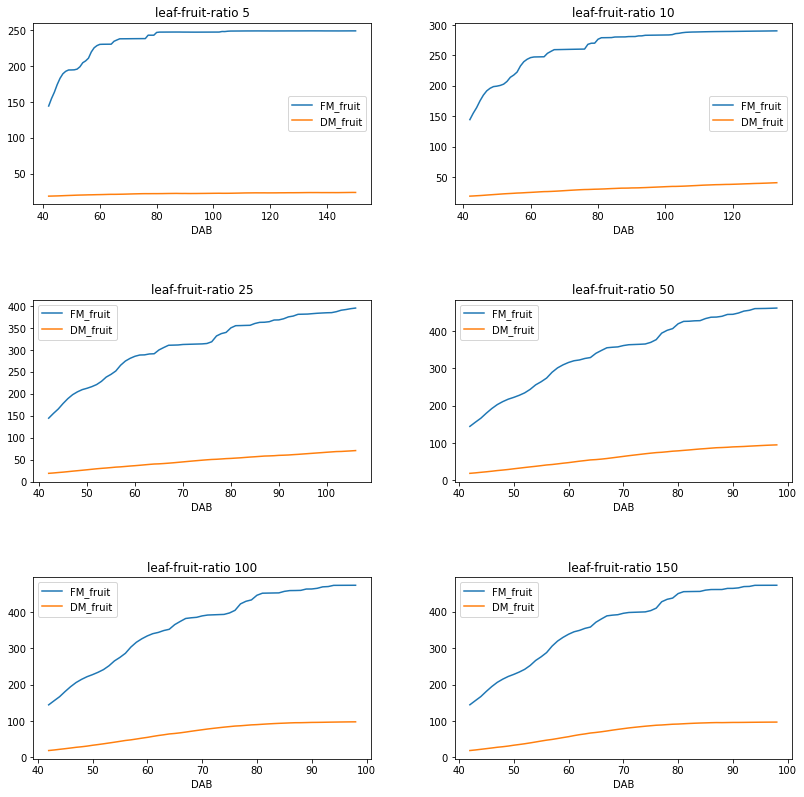

In [6]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit', 'DM_fruit']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

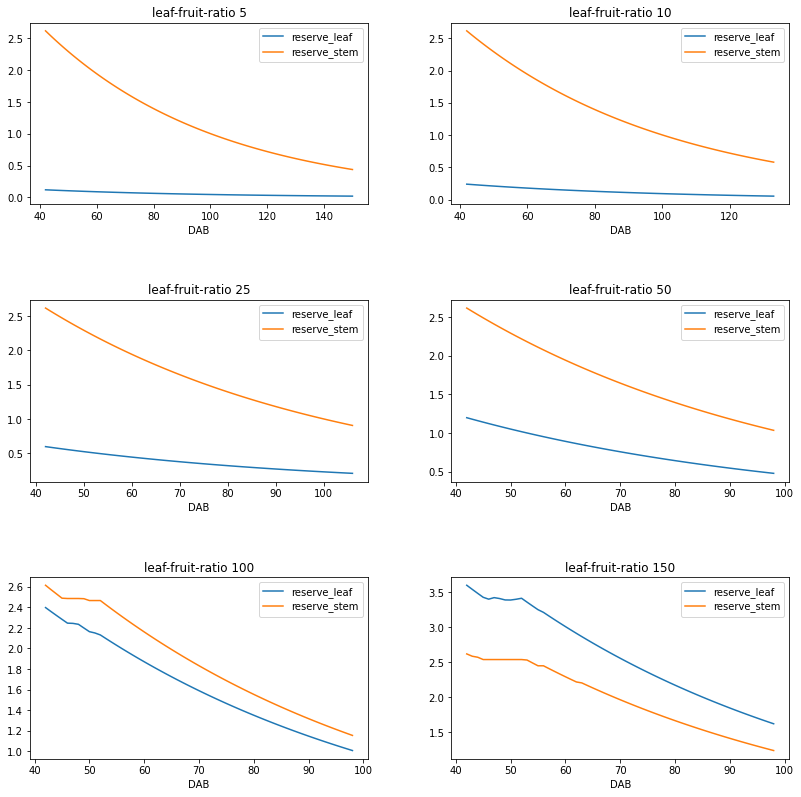

In [7]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

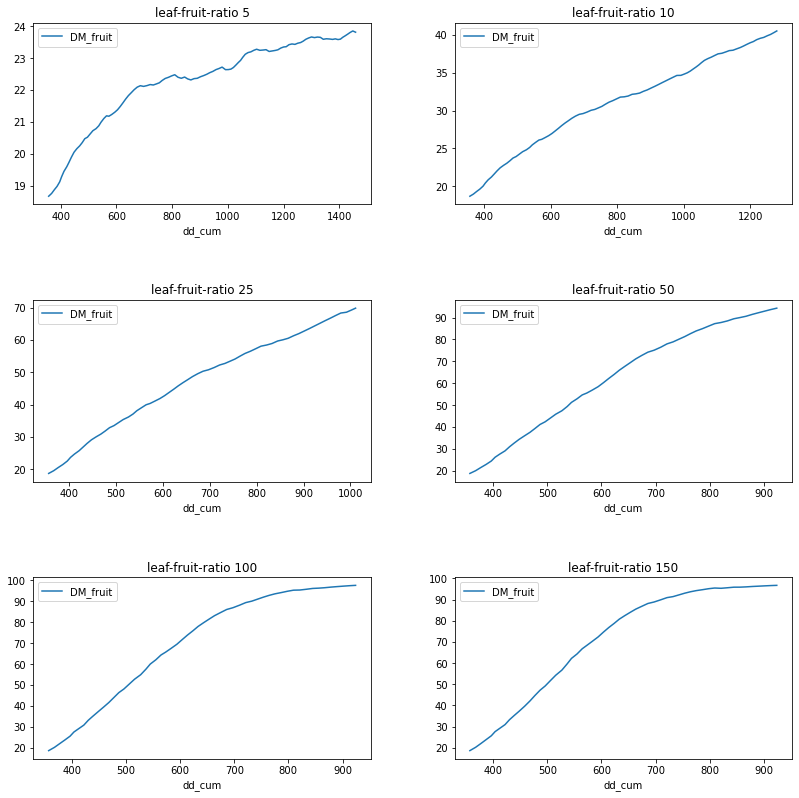

In [8]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))